/home/person/miniconda3/lib/python3.12/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


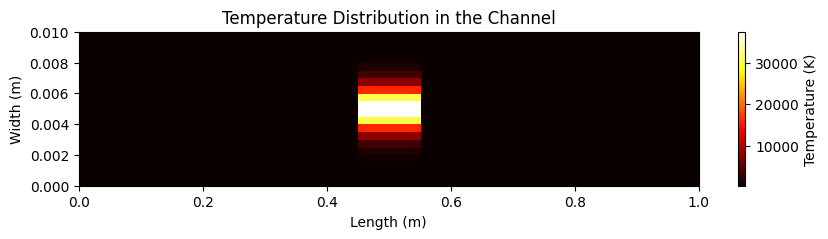

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and domain parameters
L = 1.0  # Length of the channel in meters (100 cm)
W = 0.01  # Width of the channel in meters (1 cm)
Nx = 200  # Number of grid points along the length
Ny = 20   # Number of grid points along the width
dx = L / Nx
dy = W / Ny

# Fluid and heat source properties
q_double_prime = 100e3  # Heat flux (W/m^2)
T_inlet = 300.0  # Inlet temperature (K)
u_inlet = 0.0002  # Inlet velocity (m/s)
k = 0.6  # Thermal conductivity of water (W/m.K)
rho = 1000.0  # Density of water (kg/m^3)
cp = 4186.0  # Specific heat capacity of water (J/kg.K)

# Initialize temperature field
T = np.full((Ny, Nx), T_inlet)

# Heat source location
source_x_start = int(Nx * 0.45)  # 45% of the channel length
source_x_end = int(Nx * 0.55)    # 55% of the channel length
source_y_start = int(Ny * 0.4)   # 40% of the channel width
source_y_end = int(Ny * 0.6)     # 60% of the channel width

# Time-stepping parameters
dt = 0.01  # Time step (s)
time_steps = 500  # Number of time steps

# Solve using an explicit finite difference method
for step in range(time_steps):
    T_new = T.copy()

    # Update temperature field
    for i in range(1, Ny-1):
        for j in range(1, Nx-1):
            # Heat diffusion (2D)
            d2T_dx2 = (T[i, j+1] - 2*T[i, j] + T[i, j-1]) / dx**2
            d2T_dy2 = (T[i+1, j] - 2*T[i, j] + T[i-1, j]) / dy**2

            # Update temperature
            T_new[i, j] = T[i, j] + dt * k / (rho * cp) * (d2T_dx2 + d2T_dy2)

    # Add heat source term
    T_new[source_y_start:source_y_end, source_x_start:source_x_end] += (
        dt * q_double_prime / (rho * cp * dx * dy)
    )

    # Boundary conditions
    T_new[:, 0] = T_inlet  # Inlet temperature
    T_new[:, -1] = T_new[:, -2]  # Zero-gradient at outlet
    T_new[0, :] = T_new[1, :]  # Adiabatic top wall
    T_new[-1, :] = T_new[-2, :]  # Adiabatic bottom wall

    T = T_new.copy()
    

# Visualization
plt.figure(figsize=(10, 2))
plt.imshow(T, extent=[0, L, 0, W], origin='lower', cmap='hot', aspect='auto')
plt.colorbar(label='Temperature (K)')
plt.title('Temperature Distribution in the Channel')
plt.xlabel('Length (m)')
plt.ylabel('Width (m)')
plt.show()


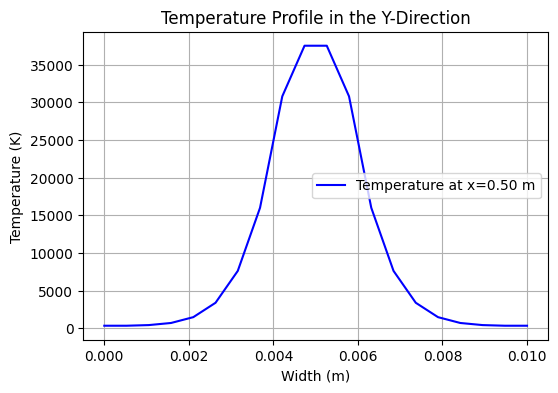

In [2]:
# Select an x-position (e.g., the center of the heat source region)
x_position = int((source_x_start + source_x_end) / 2)

# Extract temperature along the y-direction at the selected x-position
temperature_profile_y = T[:, x_position]

# Generate y-coordinates for the grid
y_coords = np.linspace(0, W, Ny)

# Plot the temperature profile
plt.figure(figsize=(6, 4))
plt.plot(y_coords, temperature_profile_y, label=f'Temperature at x={x_position*dx:.2f} m', color='blue')
plt.title('Temperature Profile in the Y-Direction')
plt.xlabel('Width (m)')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid()
plt.show()

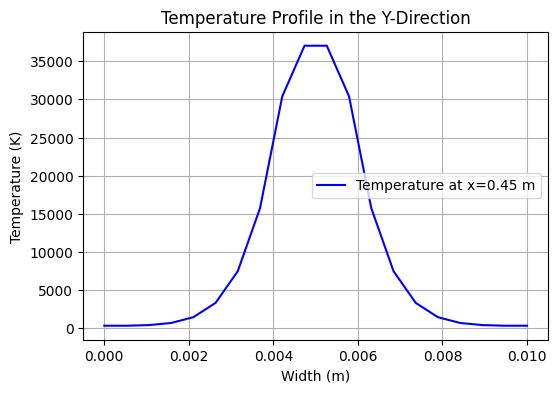

In [8]:
x_position_2 = int(source_x_start+0.01)
# Extract temperature along the y-direction at the selected x-position
temperature_profile_y = T[:, x_position_2]

# Generate y-coordinates for the grid
y_coords = np.linspace(0, W, Ny)

# Plot the temperature profile
plt.figure(figsize=(6, 4))
plt.plot(y_coords, temperature_profile_y, label=f'Temperature at x={x_position_2*dx:.2f} m', color='blue')
plt.title('Temperature Profile in the Y-Direction')
plt.xlabel('Width (m)')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid()
plt.show()